# Importing the Dependencies

In [1]:
#initialization
import numpy as np

#importing necessary libraries for Qiskit
from qiskit import IBMQ, BasicAer
from qiskit.providers.ibmq import least_busy
from qiskit import QuantumCircuit, execute
from qiskit.tools.jupyter import *
provider = IBMQ.load_account()

#import basic plot tools
from qiskit.visualization import plot_histogram

C:\Users\VIMAL\AppData\Local\Temp\ipykernel_456\1169694562.py:9: DeprecationWarning: The qiskit.IBMQ entrypoint and the qiskit-ibmq-provider package (accessible from 'qiskit.providers.ibmq`) are deprecated and will be removed in a future release. Instead you should use the qiskit-ibm-provider package which is accessible from 'qiskit_ibm_provider'. You can install it with 'pip install qiskit_ibm_provider'. Just replace 'qiskit.IBMQ' with 'qiskit_ibm_provider.IBMProvider'
  provider = IBMQ.load_account()


# Algorithm

We are now going to create the oracle

In [2]:
def dj_oracle(case, n):
    # We need to make a QuantumCircuit object to return
    # This circuit has n+1 qubits: the size of the input
    # Plus one output qubit
    oracle_qc = QuantumCircuit(n+1)
    
    # First, let's deal with the case in which oracle is balanced
    if case == "balanced":
        # We apply CNOT gates for each qubit, using the output qubit as the target:
        for qubit in range(n):
            oracle_qc.cx(qubit, n)
            
    # Case in which oracle is constant
    if case == "constant":
        # First decide what the fixed output of the oracle will be (either always 0 or always 1)
        output = np.random.randint(2)
        if output == 1:
            oracle_qc.x(n)
            
    oracle_gate = oracle_qc.to_gate()
    oracle_gate.name = "Oracle" # To show when we display the circuit
    return oracle_gate

We are going to create the DJ Algorithm and append oracle in it

In [3]:
def dj_algorithm(n, case = 'random'):
    dj_circuit = QuantumCircuit(n+1, n)
    # Set up the inpt register
    for qubit in range(n):
        dj_circuit.h(qubit)
    # Now set up the output qubit
    dj_circuit.x(n)
    dj_circuit.h(n)
    # Now, let's append the oracle gate to our circuit
    if case == 'random':
        random = np.random.randint(2)
        if random == 0:
            case = 'constant'
        else:
            case = 'balanced'          
    oracle = dj_oracle(case, n)
    dj_circuit.append(oracle, range(n+1))
    # Finally, perform the H-gates again and measure the output
    for i in range(n):
        dj_circuit.h(i)
        dj_circuit.measure(i, i)
    return dj_circuit

# Stimulating in local computer

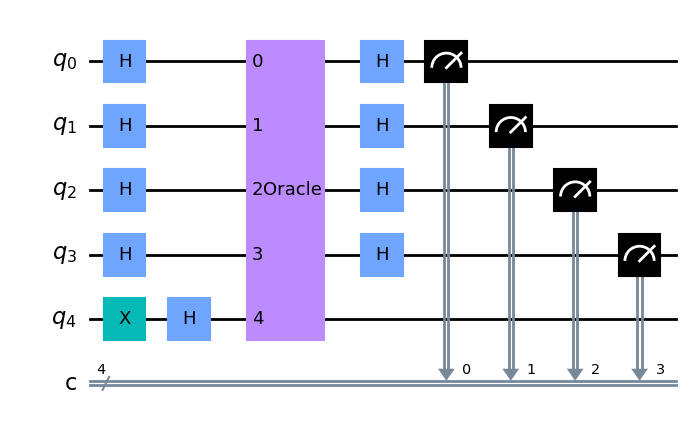

In [5]:
n = 4
dj_circuit = dj_algorithm(n)
dj_circuit.draw(output='mpl')

Case - 1: When it is assigned as constant

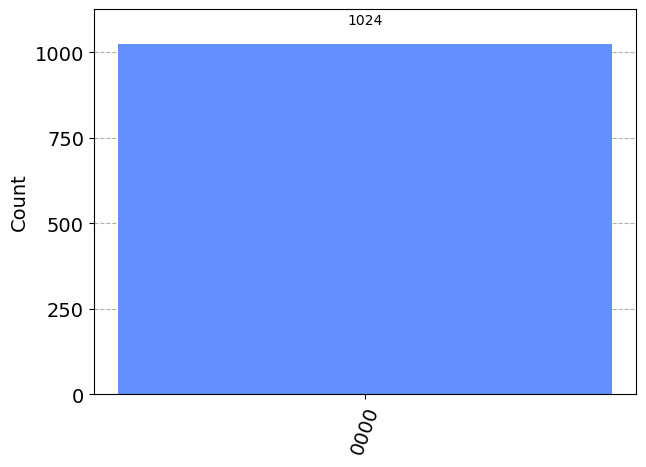

In [10]:
# Use local simulator to run in the classical computer
backend = BasicAer.get_backend('qasm_simulator')
shots = 1024
dj_circuit = dj_algorithm(n, 'constant')
results = execute(dj_circuit, backend=backend, shots=shots).result()
answer = results.get_counts()

plot_histogram(answer)

Here we can see that for constant all shots are 0000 with 100% probability

Case - 2: When it is assigned as random

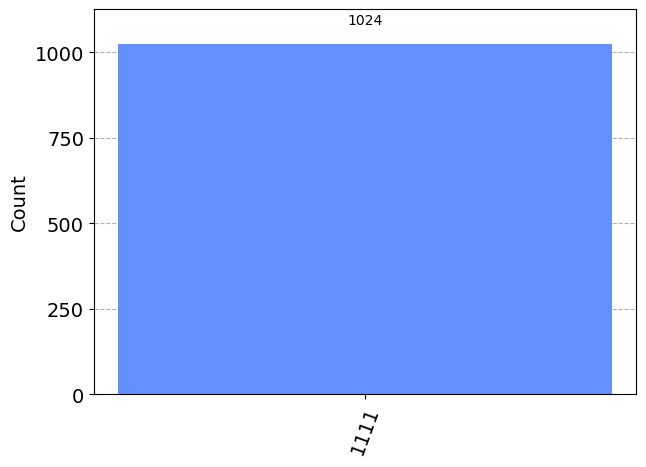

In [11]:
# Use local simulator to run in the classical computer
backend = BasicAer.get_backend('qasm_simulator')
shots = 1024
dj_circuit = dj_algorithm(n, 'random')
results = execute(dj_circuit, backend=backend, shots=shots).result()
answer = results.get_counts()

plot_histogram(answer)

Here we can see that for random all shots are 1111 with 100% probability

Case - 3: When it isn't assigned anything

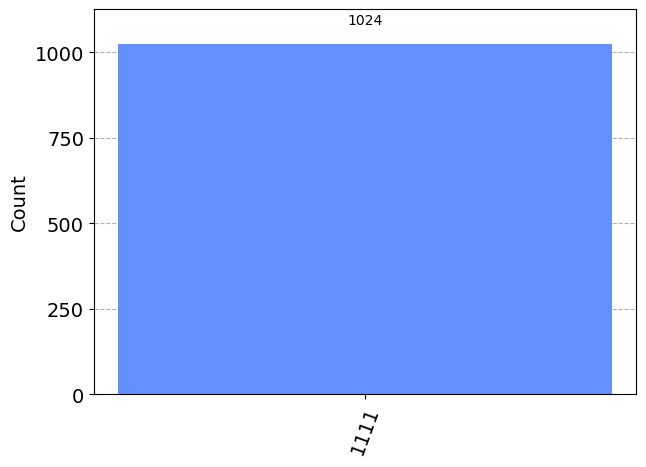

In [20]:
# Use local simulator to run in the classical computer
# Here I haven't specified whether it is constant or random
backend = BasicAer.get_backend('qasm_simulator')
shots = 1024
dj_circuit = dj_algorithm(n)
results = execute(dj_circuit, backend=backend, shots=shots).result()
answer = results.get_counts()

plot_histogram(answer)

# Stimulating using Quantum computer

Case - 1: When it is assigned as constant

In [7]:
# Now we are going to stimulate in the quantum computer
backend_qc = least_busy(provider.backends(filters=lambda x: x.configuration().n_qubits >= (n+1) and 
                                         not x.configuration().simulator and x.status().operational==True))
print("Least busy backend: ", backend_qc)
%qiskit_job_watcher
dj_circuit = dj_algorithm(n, 'constant')
job = execute(dj_circuit, backend=backend_qc, shots=1024, optimization_level=3)
# Here it is specified as constant 

Least busy backend:  ibmq_manila


Accordion(children=(VBox(layout=Layout(max_width='710px', min_width='710px')),), layout=Layout(max_height='500…

<IPython.core.display.Javascript object>

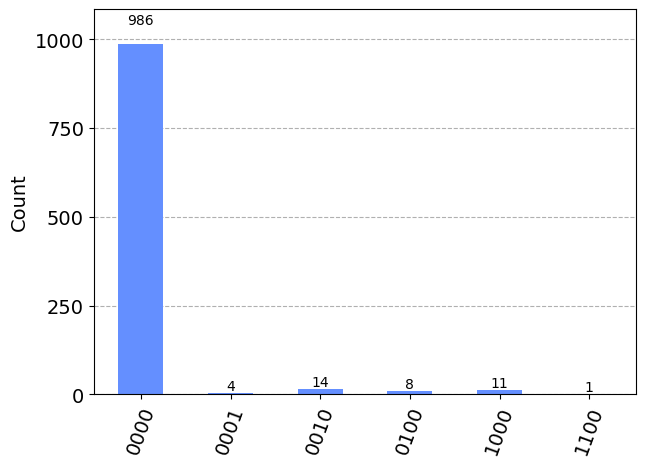

In [8]:
# Get the results of the computation
results_qc = job.result()
answer_qc = results_qc.get_counts()
plot_histogram(answer_qc)

Case - 2: When it is assigned as random

In [14]:
# Now we are going to stimulate in the quantum computer
backend_qc = least_busy(provider.backends(filters=lambda x: x.configuration().n_qubits >= (n+1) and 
                                         not x.configuration().simulator and x.status().operational==True))
print("Least busy backend: ", backend_qc)
%qiskit_job_watcher
dj_circuit_ran = dj_algorithm(n, 'random')
job = execute(dj_circuit_ran, backend=backend_qc, shots=1024, optimization_level=3)
# Here it is specified as random

Least busy backend:  ibmq_manila


Accordion(children=(VBox(layout=Layout(max_width='710px', min_width='710px')),), layout=Layout(max_height='500…

<IPython.core.display.Javascript object>

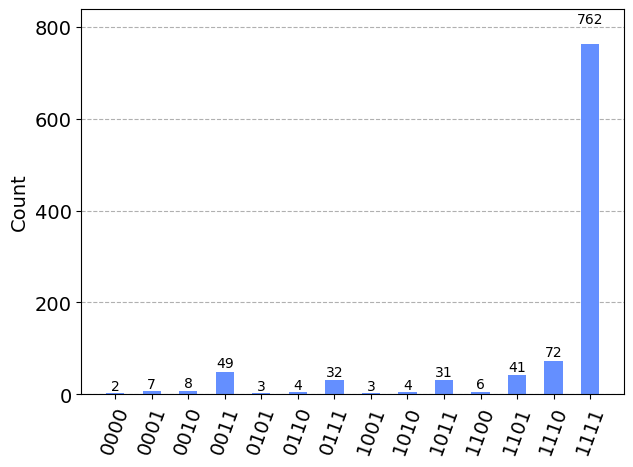

In [15]:
# Get the results of the computation
results_qc = job.result()
answer_qc = results_qc.get_counts()
plot_histogram(answer_qc)

Case - 3: When it isn't assigned anything

In [17]:
# Now we are going to stimulate in the quantum computer
backend_qc = least_busy(provider.backends(filters=lambda x: x.configuration().n_qubits >= (n+1) and 
                                         not x.configuration().simulator and x.status().operational==True))
print("Least busy backend: ", backend_qc)
%qiskit_job_watcher
dj_circuit = dj_algorithm(n)
job = execute(dj_circuit, backend=backend_qc, shots=1024, optimization_level=3)
# Here I haven't specified whether it is constant or random

Least busy backend:  ibmq_manila


Accordion(children=(VBox(layout=Layout(max_width='710px', min_width='710px')),), layout=Layout(max_height='500…

<IPython.core.display.Javascript object>

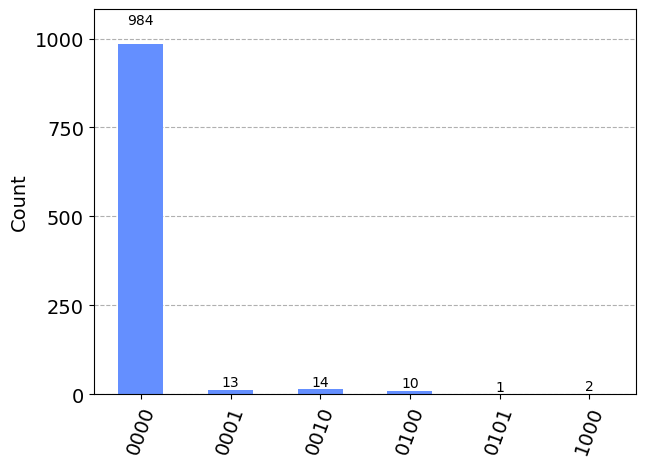

In [18]:
# Get the results of the computation
results_qc = job.result()
answer_qc = results_qc.get_counts()
plot_histogram(answer_qc)